In [4]:
%load_ext autoreload
%autoreload 2

import IPython
import ipywidgets as ipw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

import np_datajoint
from np_datajoint.classes import *
from np_datajoint.comparisons import *
from np_datajoint.config import *
from np_datajoint.utils import *
import notebook_setup

DEBUG = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
for pair in local_dj_probe_pairs():
        
        print('\n'.join(probe.__repr__() for probe in pair.values()))
        display(
            ipw.VBox([
                ipw.HBox([
                    ipw.Image(
                        value=probe_obj.depth_img.open('rb').read(),
                        format='png',
                        width=400,
                    ) for probe_obj in [pair['local'], pair['dj']]
                ]),
            ])
        )

In [ ]:
sns.set(font_scale=2)

metrics = ['firing_rate', 'amplitude', 'peak_channel']

probes_in_comparison = 2
palette = sns.color_palette()[:probes_in_comparison]
palette_255 = [tuple(int(c*255) for c in col) for col in palette]

for pair in local_dj_probe_pairs():
    # skip if requirements for plot not met
    if any(
        not probe.metrics_csv.exists()
        or 'quality' not in probe.metrics_df.columns
        or all(probe.metrics_df['quality'] == 'noise')
        or len(probe.metrics_df.loc[probe.metrics_df['quality']=='good']) == 1
        for probe in pair.values()
    ):
        continue 
    
    # display probe object/color key
    key = ''
    for rgb, probe in zip(palette_255, pair.values()):
        key += (
            f'<code style="color:rgb{rgb};">{probe.__repr__()}\n</code>'
        )
    display(IPython.display.HTML(key))    
    
    fig, axs = plt.subplots(
        ncols=len(metrics), 
        figsize=(20,5), 
    )
    
    for col, metric in enumerate(metrics):
        ax = axs[col]
        
        for pair_idx, probe_obj in enumerate(pair.values()):
            
            ax_rtn = probe_obj.plot_metric_good_units(
                metric,
                ax=ax,
                color=palette[pair_idx],
                )
            if ax_rtn is None:
                continue
            if col > 0:
                ax.set_ylabel('')
            if col == len(metrics)//2:
                ax.legend(probe_obj.__class__.__name__.split('Probe')[-1])
        if ax_rtn is None:
            continue
        
        ax.set(yticklabels=[])
            
    plt.show()
    break

In [25]:
dj = ProbeDataJoint('1185043018_608980_20220616', probe_letter='F')
local = ProbeLocal('1185043018_608980_20220616', probe_letter='F')

In [28]:
# dj.metrics_df.head()
# dj.metrics_df.to_csv('metrics_test.csv')
pd.read_csv('metrics_test.csv')

,Unnamed: 0,cluster_id,firing_rate,presence_ratio,isi_viol,num_viol,amplitude_cutoff,isolation_distance,contam_rate,l_ratio,...,duration,halfwidth,PT_ratio,repolarization_slope,recovery_slope,amplitude,spread,velocity_above,velocity_below,quality
0,0,0,0.002458,0.10,0.000000,0.0,0.021565,1.029693,1.000000,1.438126e-01,...,0.714238,0.343384,1.340664,0.090029,-0.028146,88.204997,1320.0,0.014791,NaN,noise
1,1,1,0.132110,0.39,1.000000,25.0,0.256137,16.119474,2.303265,2.299624e-01,...,0.343384,0.247236,0.726360,0.264366,-0.091776,69.952695,1220.0,0.048411,NaN,good
2,2,2,0.007169,0.13,0.000000,0.0,0.500000,0.736883,1.000000,2.930017e-01,...,0.384590,0.219765,0.570165,0.153097,-0.042125,51.669427,760.0,0.273099,-0.122637,noise
3,3,3,0.002663,0.08,0.000000,0.0,0.019906,0.298203,0.000000,3.641464e-01,...,0.302178,0.178559,0.623900,0.312778,-0.071569,75.854997,1320.0,0.125601,NaN,noise
4,4,4,2.424264,0.91,1.000000,57.0,0.051346,NaN,14.899186,0.000000e+00,...,0.233501,0.123618,6.719103,0.371630,-0.012330,93.729867,0.0,NaN,NaN,noise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,432,445,0.008602,0.30,0.000000,0.0,0.344532,83.487967,1.000000,3.050667e-07,...,0.810385,0.219765,0.493433,0.227639,-0.057338,119.664996,300.0,1.384980,-3.221265,good
433,433,446,0.118182,0.66,1.000000,1.0,0.030230,42.161908,0.389628,1.076298e-03,...,0.659296,0.206030,0.480824,0.782285,-0.130980,268.297685,180.0,0.706389,0.618090,good
434,434,447,0.012084,0.38,0.000000,0.0,0.372418,46.766565,0.000000,4.190708e-05,...,0.604355,0.288442,0.544235,0.218069,-0.038807,107.035166,280.0,0.809404,0.743998,good
435,435,448,0.871514,0.99,1.000000,34.0,0.022391,30.941271,14.032521,3.084942e-02,...,0.563149,0.260972,0.532946,0.252512,-0.033760,92.334837,200.0,0.833932,0.480737,good


In [3]:
for probe in (local, dj):
    probe.get_qc_units()

In [24]:
dj.qc_units_df.head()


,firing_rate,presence_ratio,isi_viol,num_viol,amplitude_cutoff,isolation_distance,contam_rate,l_ratio,d_prime,nn_hit_rate,...,spread,velocity_above,velocity_below,quality,times,template,peakChan,position,amplitudes,probe
uid,,,,,,,,,,,,,,,,,,,,,
F1,0.132110,0.39,1.0,25.0,0.256137,1.611947e+01,2.303265,2.299624e-01,0.665806,0.946667,...,1220.0,0.048411,NaN,good,"[1138811, 5579282, 7113782, 9631728, 9634763, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,"[32.0, 20.0]","[[11.866018295288086], [12.044901847839355], [...",F
F6,2.046779,0.99,0.0,0.0,0.053034,1.073945e+02,0.206701,1.816298e-09,8.273361,1.000000,...,140.0,1.283956,-0.686767,good,"[3464, 8052, 10157, 16253, 22306, 31242, 38168...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",7,"[0.0, 1100.0]","[[19.887174606323242], [18.15366554260254], [1...",F
F7,6.633136,0.99,1.0,221.0,0.404132,4.501528e+01,57.258138,2.339354e-02,4.193747,0.964000,...,100.0,0.372816,NaN,good,"[595, 6638, 8188, 10502, 12083, 13086, 15419, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",10,"[0.0, 1180.0]","[[23.152259826660156], [13.676194190979004], [...",F
F8,0.001843,0.09,0.0,0.0,0.500000,2.313852e+14,1.000000,NaN,5.043211,NaN,...,460.0,-1.239243,-2.742803,good,"[26430245, 60842057, 62794281, 63863969, 68012...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",12,"[48.0, 1200.0]","[[10.555378913879395], [16.839677810668945], [...",F
F9,1.001781,0.91,1.0,6.0,0.024348,5.466686e+01,1.464542,4.159716e-04,5.223071,0.974178,...,100.0,0.206030,-1.030151,good,"[11824, 498772, 503783, 672652, 677916, 757178...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",12,"[48.0, 1200.0]","[[12.363555908203125], [11.681358337402344], [...",F


In [23]:
for uid, unnamed in zip(local.qc_units_df.index, local.qc_units_df['Unnamed: 0']):
    if str(uid) != (f:=f'F{unnamed}'):
        print(uid, f) 
    

F47 F46
F48 F47
F51 F50
F52 F51
F53 F52
F54 F53
F55 F54
F56 F55
F57 F56
F58 F57
F61 F60
F62 F61
F63 F62
F64 F63
F65 F64
F66 F65
F67 F66
F68 F67
F69 F68
F71 F70
F72 F71
F73 F72
F74 F73
F75 F74
F76 F75
F77 F76
F78 F77
F79 F78
F81 F80
F82 F81
F83 F82
F84 F83
F85 F84
F86 F85
F87 F86
F88 F87
F89 F88
F90 F89
F91 F90
F92 F91
F93 F92
F95 F93
F96 F94
F97 F95
F99 F96
F100 F97
F101 F98
F102 F99
F103 F100
F105 F102
F106 F103
F108 F105
F109 F106
F111 F108
F112 F109
F113 F110
F114 F111
F115 F112
F117 F114
F118 F115
F119 F116
F120 F117
F121 F118
F126 F121
F127 F122
F128 F123
F130 F125
F131 F126
F132 F127
F134 F128
F135 F129
F136 F130
F137 F131
F139 F133
F140 F134
F141 F135
F142 F136
F143 F137
F144 F138
F145 F139
F146 F140
F147 F141
F148 F142
F149 F143
F150 F144
F151 F145
F152 F146
F153 F147
F154 F148
F156 F150
F157 F151
F158 F152
F159 F153
F160 F154
F163 F155
F164 F156
F165 F157
F167 F159
F168 F160
F169 F161
F170 F162
F173 F165
F174 F166
F175 F167
F176 F168
F177 F169
F178 F170
F179 F171
F180 F172
F18

ValueError: setting an array element with a sequence.

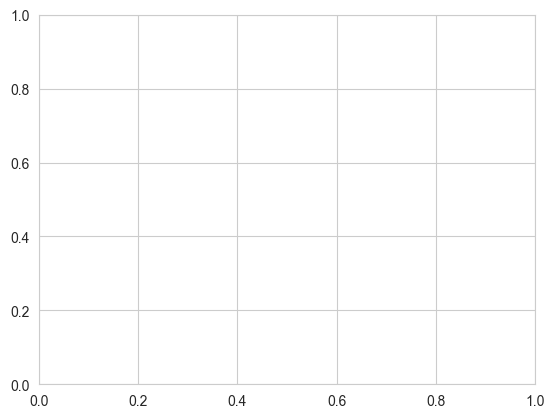

In [162]:
# import array
from numpy import array
units_l, units_dj = (local.qc_units_df, dj.qc_units_df)
var1 = 'peak_channel'
var2 = 'isolation_distance'
l = []
d = []
c=[]
for chan in set(units_l[var1]) & set(units_l[var1]):
    max_units = []
    for idx, units in enumerate((units_l, units_dj)):
        chan_units = units.loc[units[var1]==chan]
        max_units.append(
            chan_units.loc[chan_units[var2]==chan_units[var2].max()]
        )
    l.append(max_units[0].firing_rate)
    d.append(max_units[1].firing_rate)
    c.append(int(chan))
# plot channels vs firing rate for local anx`d dj
pd.DataFrame({'local':l, 'channel':c}).plot.scatter(x='channel', y='local')

[2022-10-30 18:58:30,394][WARNING]: MySQL server has gone away. Reconnecting to the server.
c:\Users\ben.hardcastle\github\np_datajoint\comparisons.py:90: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


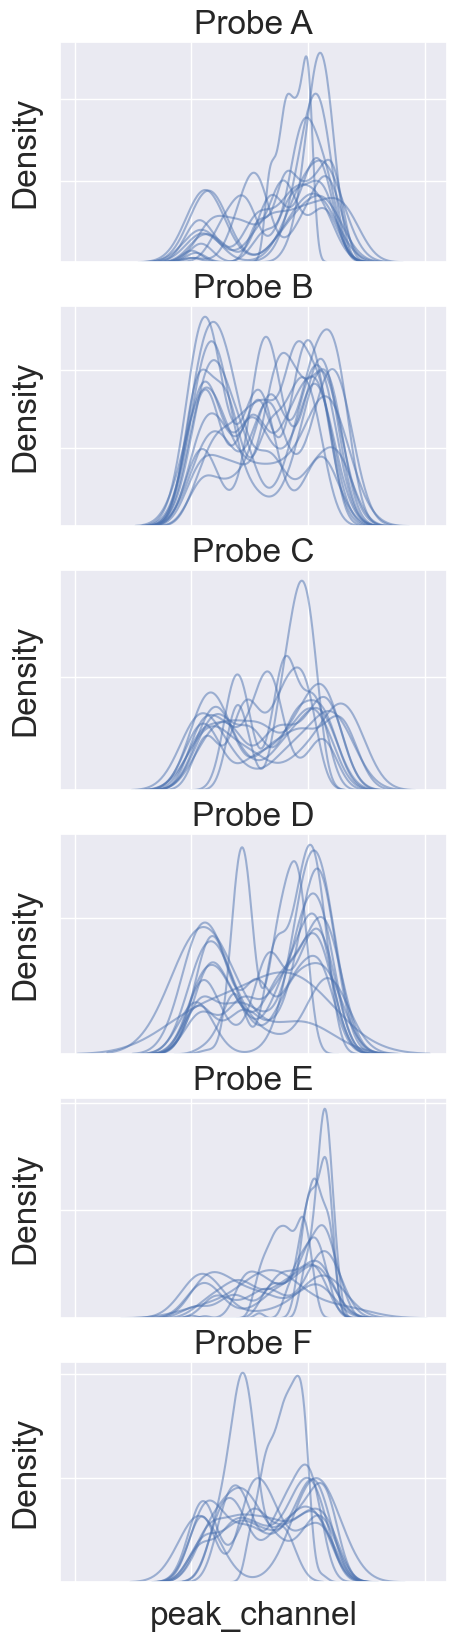

In [152]:
sns.set(font_scale=2)

fig, axs = plt.subplots(
    nrows=6, 
    figsize=(5,20),
    sharex=True,
)
for idx, ax in enumerate(axs):
    if idx < 5:
        ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.set_title(f'Probe {chr(65+idx)}')
    
for pair in local_dj_probe_pairs():
    probe_obj = pair['local']
    if any(
        not probe.metrics_csv.exists()
        or 'quality' not in probe.metrics_df.columns
        or all(probe.metrics_df['quality'] == 'noise')
        or len(probe.metrics_df.loc[probe.metrics_df['quality']=='good']) == 1
        for probe in [probe_obj]
    ):
        continue 
            
    ax_rtn = probe_obj.plot_metric_good_units(
        'peak_channel',
        ax=axs[probe_obj.probe_index],
        color=sns.color_palette()[0],
        alpha=0.5,
        )

    # break